In [7]:
with open('./data/meta_v1.pickle', 'wb') as f:
    pickle.dump(meta, f)

In [62]:
clustered = HAC_cluster(meta_charging_station, whole, 0.15)

Text(0, 0.5, 'Count')

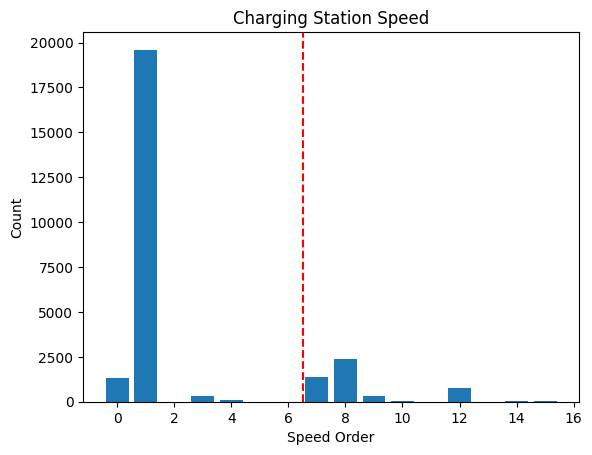

In [63]:
plt.bar(np.arange(0,16,1), meta['output'].value_counts().sort_index().values)
plt.axvline(x=6.5, color='r', linestyle='--')
plt.title('Charging Station Speed')
plt.xlabel('Speed Order')
plt.ylabel('Count')

In [20]:
list(charger_type_prob.values())

[0.08297163621681639,
 0.2351872413445039,
 0.622691026546886,
 0.05915009589179368]

In [21]:
6110 + 2780 + 8450

17340

In [74]:
clustered.loc[clustered['zscode'].isna()]
clustered.loc[4689, 'zscode'] = '41210'
clustered.loc[4690, 'zscode'] = '41210'
clustered.loc[4691, 'zscode'] = '41410'
clustered.loc[4748, 'zscode'] = '41150'

In [76]:
def zcode(df):
    if df.startswith('11'):
        df = '11'
    elif df.startswith('28'):
        df = '28'
    else:
        df = '41'
    return df

In [77]:
clustered['zcode'] = clustered['zscode'].apply(zcode)

In [78]:
clustered['zcode'].value_counts().values

array([5140, 2922,  886])

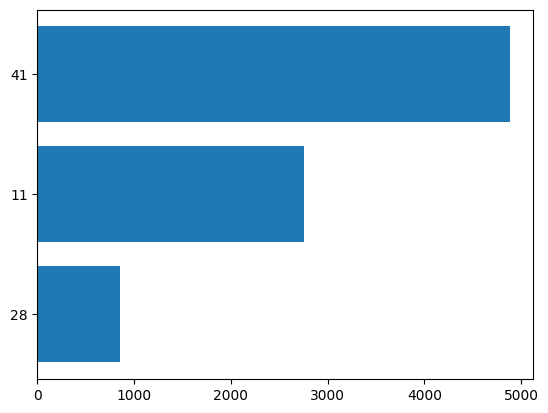

In [26]:
plt.barh(['41', '11', '28'], clustered['zcode'].value_counts().values)
plt.gca().invert_yaxis()

Text(0.5, 1.0, 'Number of Charging Stations in Each Cluster')

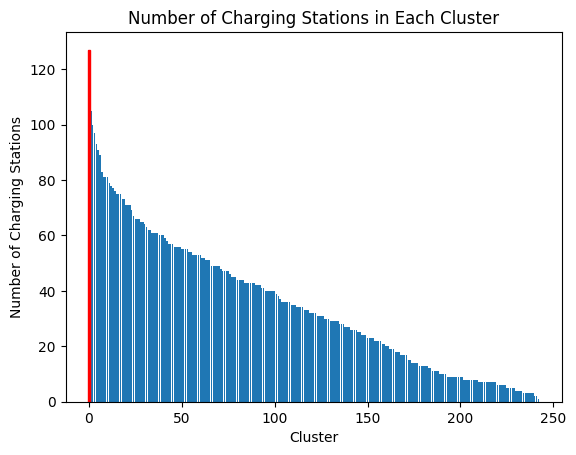

In [27]:
plt.bar(np.arange(0,243,1), clustered['Cluster'].value_counts().values)
specific_bar_color = 'red'
bar_index_to_color = 0  # Index of the bar you want to color differently

# Get the bar container for the specific bar
bar_container = plt.bar(np.arange(0,243,1)[bar_index_to_color], clustered['Cluster'].value_counts().values[bar_index_to_color])

# Set the color for the specific bar
bar_container[0].set_color(specific_bar_color)
plt.xlabel('Cluster')
plt.ylabel('Number of Charging Stations')
plt.title('Number of Charging Stations in Each Cluster')

In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

#고유 충전소
with open('./after_processing.pickle', 'rb') as f:
    clustered = pickle.load(f)

with open('./after_city_log_datetime.pickle', 'rb') as f:
    city_log_datetime = pickle.load(f)

with open('./driver_df.pickle', 'rb') as f:
    driver_df = pickle.load(f)

with open('./city_log.pickle', 'rb') as f:
    city_log = pickle.load(f)

/home/jhmoon/venvEV/env/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [173]:
import math

def haversine_distance(coord1, coord2):
    # Radius of the Earth in kilometers
    radius_earth = 6371.0  # approximate value

    # Convert latitude and longitude from degrees to radians
    lat1, lon1 = math.radians(coord1[0]), math.radians(coord1[1])
    lat2, lon2 = math.radians(coord2[0]), math.radians(coord2[1])

    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    
    # Calculate the distance
    distance = radius_earth * c

    return distance

In [184]:
import pandas as pd
import networkx as nx

# Sample dataframe
data = {
    "stationID": temp[:, 0],
    "chargertype": temp[:, 1],
    "latitude": temp[:, 2],
    "longitude": temp[:, 3],
    "businessID": temp[:, 4],
    "speed": temp[:, 5],
    "cluster": temp[:, 6]
}

df = pd.DataFrame(data)

# Create an empty graph
G = nx.Graph()

# Add nodes with attributes
for index, row in df.iterrows():
    station_id = row["stationID"]
    attributes = {
        "chargertype": row["chargertype"],
        "businessID": row["businessID"],
        "speed": row["speed"],
        "cluster": row["cluster"]
    }
    G.add_node(station_id, **attributes)

# Add edges based on criteria (customize this based on your criteria)
# Example: Connect charging stations in the same cluster
weights = []
for cluster_id in df["cluster"].unique():
    stations_in_cluster = df[df["cluster"] == cluster_id]["stationID"].tolist()
    if len(stations_in_cluster) > 1:
        for i in range(len(stations_in_cluster)):
            for j in range(i + 1, len(stations_in_cluster)):
                if cluster_id == 180:
                    weight = haversine_distance(df.loc[df['stationID'] == stations_in_cluster[i]][['latitude', 'longitude']].values[0], df.loc[df['stationID'] == stations_in_cluster[j]][['latitude', 'longitude']].values[0])
                    weights.append(weight)
                G.add_edge(stations_in_cluster[i], stations_in_cluster[j])


In [196]:
weights[:10]

[1.6301387180930051,
 1.6057592054781527,
 2.7852061896187306,
 2.09546901517429,
 2.567003735249168,
 1.7383461300627847,
 0.8958686834919446,
 0.6209121637949983,
 0.5298248259667362,
 0.7791583637291746]

In [194]:
reverse_weights = [1 / i for i in weights if i != 0]

In [197]:
reverse_weights[:10]

[0.6134447264523819,
 0.622758379082265,
 0.3590398454977191,
 0.4772201319888404,
 0.38955923058013564,
 0.5752594277434739,
 1.116235022416644,
 1.6105337571227905,
 1.8874162760783555,
 1.2834361364149935]

In [180]:
stations_in_cluster = df[df["cluster"] == 180]["stationID"].tolist()

In [182]:
df.loc[df['stationID'] == stations_in_cluster[0]][['latitude', 'longitude']].values[0]

array([37.5529087, 127.1372547], dtype=object)

In [156]:
df[df["cluster"] == 180]["stationID"].tolist()

['ME174003',
 'ME174004',
 'ME174005',
 'ME18B279',
 'ME20A197',
 'CV000456',
 'CV000626',
 'CV001676',
 'CV001789',
 'CV001816',
 'CV001818',
 'CV001830',
 'CV001968',
 'EP220607',
 'EV003437',
 'EV003935',
 'EV003940',
 'EV004117',
 'EV005812',
 'EV006338',
 'EV006339',
 'EV006691',
 'EV006692',
 'EV006693',
 'EV007791',
 'EV010072',
 'EV010073',
 'EV010074',
 'EV010075',
 'EV010297',
 'GN000597',
 'GN008610',
 'HE000756',
 'HM000455',
 'HM000609',
 'HM001359',
 'HM001571',
 'HSH00012',
 'HSH00013',
 'HSH00014',
 'HSH00059',
 'HSH00090',
 'HSH00134',
 'HSH00146',
 'HSH00148',
 'HSH00149',
 'HSH00186',
 'HSH00247',
 'HSH00247',
 'HSH00390',
 'HW000042',
 'HW000046',
 'HW000050',
 'JE050032',
 'KE000024',
 'KE000025',
 'KE000670',
 'KL002075',
 'KL002081',
 'KP004628',
 'PI200724',
 'PI200733',
 'PI200872',
 'PI200898',
 'PI200965',
 'PI200965',
 'PI202618',
 'PI204012',
 'PI204047',
 'PI709051',
 'SE000023',
 'SN000165',
 'SN000166',
 'SN000167',
 'SN000168',
 'ST117109',
 'ST117117',

In [160]:
c100 = clustered.loc[clustered['Cluster'] == 180]

In [162]:
coor = c100[['lat', 'lng']].values

In [172]:

coor

array([[ 37.5529087 , 127.1372547 ],
       [ 37.5448122 , 127.1218396 ],
       [ 37.5387951 , 127.1333987 ],
       [ 37.53025   , 127.12379   ],
       [ 37.5345623 , 127.1426858 ],
       [ 37.531025  , 127.1279827 ],
       [ 37.537385  , 127.1349238 ],
       [ 37.544907  , 127.1360689 ],
       [ 37.547466  , 127.1356803 ],
       [ 37.550854  , 127.1426773 ],
       [ 37.546111  , 127.1393994 ],
       [ 37.545743  , 127.141218  ],
       [ 37.5591854 , 127.1304705 ],
       [ 37.52602651, 127.16319969],
       [ 37.53857898, 127.12374243],
       [ 37.5544869 , 127.1305792 ],
       [ 37.5387319 , 127.1342896 ],
       [ 37.5286364 , 127.1378923 ],
       [ 37.5253855 , 127.1318773 ],
       [ 37.5383026 , 127.1347907 ],
       [ 37.53816688, 127.13515717],
       [ 37.5378584 , 127.1389672 ],
       [ 37.5405554 , 127.1249758 ],
       [ 37.5303607 , 127.1228308 ],
       [ 37.5351543 , 127.1271458 ],
       [ 37.53838168, 127.1304195 ],
       [ 37.53766134, 127.13000526],
 

In [171]:
import math

def haversine_distance(coord1, coord2):
    # Radius of the Earth in kilometers
    radius_earth = 6371.0  # approximate value

    # Convert latitude and longitude from degrees to radians
    lat1, lon1 = math.radians(coord1[0]), math.radians(coord1[1])
    lat2, lon2 = math.radians(coord2[0]), math.radians(coord2[1])

    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    
    # Calculate the distance
    distance = radius_earth * c

    return distance


distance = haversine_distance(coor[0, :], coor[2, :])
print(f"Distance between coordinates 1 and 2: {distance} km")


Distance between coordinates 1 and 2: 1.6057592054781527 km


In [ ]:
weight = calculate_weight_between_stations(stations_in_cluster[i], stations_in_cluster[j])

In [147]:
from node2vec import Node2Vec

In [148]:
# Precompute the probabilities and generate walks
node2vec = Node2Vec(G, dimensions=64, walk_length=30, num_walks=200, workers=4)

# Learn embeddings
model = node2vec.fit(window=10, min_count=1, batch_words=4)

# Access the embeddings
node_embeddings = {str(node): model.wv[str(node)] for node in G.nodes()}

# Example: Get the embedding for a specific charging station node (replace 'node_id' with your node ID)
# embedding_for_node = node_embeddings.get('ME174003', None)

Computing transition probabilities:   0%|          | 0/8488 [00:00<?, ?it/s]

Generating walks (CPU: 4): 100%|██████████| 50/50 [10:20<00:00, 12.40s/it]


In [150]:
node_embeddings

{'ME174003': array([ 5.65613687e-01, -7.77070105e-01, -7.87788779e-02,  1.05890381e+00,
        -3.66762251e-01, -8.80842432e-02, -3.06096822e-01, -5.26259482e-01,
         7.80284107e-02,  3.28170747e-01,  3.03751022e-01, -8.39372933e-01,
         8.14828157e-01,  5.29789133e-04,  8.72902811e-01,  4.17395771e-01,
        -8.14939260e-01,  3.18173736e-01,  8.49816859e-01,  3.93009424e-01,
         8.37399602e-01, -4.44071919e-01, -1.26089424e-01, -4.02601659e-01,
         3.90104830e-01,  1.23162472e+00,  1.06158316e-01,  1.18351035e-01,
        -2.51077414e-01,  5.34385681e-01,  1.11316614e-01, -6.10171318e-01,
         1.65725008e-01, -4.59941059e-01, -4.82578039e-01, -7.32049227e-01,
         3.29405963e-01, -4.33513932e-02, -1.67443857e-01, -8.91790390e-02,
         4.47558463e-01, -1.18901834e-01,  9.88823175e-01, -2.28465945e-01,
        -1.88855350e-01, -4.18451309e-01, -5.37452817e-01,  1.46130443e-01,
        -6.60970509e-02,  6.42932117e-01,  4.40586925e-01,  6.79522827e-02,


In [154]:
model.sample

0.001

{'ME174003': array([-1.35287017e-01, -2.20145173e-02, -3.66462278e-03,  3.46436799e-01,
        -2.41388366e-01, -3.26313138e-01,  6.61520839e-01,  6.83523595e-01,
        -3.87740761e-01, -8.57390538e-02,  6.88341200e-01,  2.18690678e-01,
         4.81641339e-03,  3.43669564e-01, -2.17122987e-01, -1.98915496e-01,
         1.33108914e-01,  2.91560233e-01, -1.45170942e-01,  1.89985320e-01,
         3.93909544e-01,  3.71020794e-01,  4.47277963e-01, -2.56797194e-01,
         1.53859168e-01, -5.98110557e-02, -2.82527864e-01,  2.31823117e-01,
        -3.43968384e-02, -2.70584762e-01, -6.99130446e-02, -5.76768517e-02,
         2.17579022e-01, -4.81513947e-01, -1.86804667e-01,  3.32635701e-01,
         2.42876023e-01, -1.26373783e-01,  5.34876049e-01,  1.43011302e-01,
         1.76465347e-01, -6.06971036e-04, -5.06422110e-02, -2.29184881e-01,
        -3.23765844e-01,  1.35906577e-01, -2.67761290e-01, -1.15957774e-01,
         2.00713277e-02,  4.09534693e-01, -1.47637418e-02,  6.28709733e-01,


In [99]:
len(clustered['Cluster'].unique())

252

In [109]:
import numpy as np

# Sample categorical features
charger_type = [1, 2, 3, 4, 5, 6, 7]
charging_speed = [1, 2]
operator = list(range(1, 45))
cluster = list(range(1, 253))

# Encoding categorical features
def one_hot_encode(values, num_categories):
    encoded = np.zeros((len(values), num_categories))
    for i, val in enumerate(values):
        encoded[i, val - 1] = 1  # Subtract 1 to match zero-based indexing
    return encoded

# One-hot encode charger type
charger_type_encoded = one_hot_encode(charger_type, num_categories=len(charger_type))

# # Encode charging speed as binary
charging_speed_encoded = np.array([[1, 0] if speed == 1 else [0, 1] for speed in charging_speed])

# # Encode operator using integer encoding (you can use embeddings if preferred)
operator_encoded = np.array(operator).reshape(-1, 1)

# # Cluster can be used directly as a feature
cluster_encoded = np.array(cluster).reshape(-1, 1)

# # Concatenate all encoded features
# encoded_features = np.concatenate((charger_type_encoded, charging_speed_encoded, operator_encoded, cluster_encoded), axis=1)

# print("Encoded Features:\n", encoded_features)


In [110]:
cluster_encoded

array([[  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
       [ 71],
      

In [27]:
charging_station_ids = test0['statid'].values
embedding_dim = 10
embedding_layer = nn.Embedding(len(charging_station_ids), embedding_dim)

# # Convert charging station IDs to numerical indices
# charging_station_indices = [charging_station_ids.index(id) for id in charging_station_ids]

# # Lookup embeddings for charging station IDs
# embedded_charging_station_ids = embedding_layer(torch.LongTensor(charging_station_indices))

# print(embedded_charging_station_ids)

In [28]:
embedding_layer

Embedding(45, 10)

In [14]:
import torch
import torch.nn as nn

# Define the number of unique categories for each categorical feature
num_drivers = 1734  # Assuming one driver in this example
num_charging_stations = 6422  # Example: Number of unique charging station IDs
num_charger_types = 7  # Example: Number of unique charger types
num_operators = 44  # Example: Number of unique operators
num_speeds = 2  # Binary: 0 or 1
num_locations = 240  # Example: Number of unique locations

# Define the embedding dimensions (you can choose based on your data)
embedding_dim = 10

# Create embedding layers for categorical features
embedding_driver = nn.Embedding(num_drivers, embedding_dim)
embedding_charging_station = nn.Embedding(num_charging_stations, embedding_dim)
embedding_charger_type = nn.Embedding(num_charger_types, embedding_dim)
embedding_operator = nn.Embedding(num_operators, embedding_dim)
embedding_speed = nn.Embedding(num_speeds, embedding_dim)
embedding_location = nn.Embedding(num_locations, embedding_dim)

# Example charging record (you should replace this with your actual data)
driver_id = torch.tensor([0])  # Driver ID
charging_station_id = torch.tensor([0])  # Charging station ID (index)
charger_type = torch.tensor([4])  # Charger type (index)
operator = torch.tensor([28])  # Operator (index)
speed = torch.tensor([0])  # Speed (binary)
location = torch.tensor([200])  # Location (index)

# Lookup embeddings for categorical features
embedded_driver = embedding_driver(driver_id)
embedded_charging_station = embedding_charging_station(charging_station_id)
embedded_charger_type = embedding_charger_type(charger_type)
embedded_operator = embedding_operator(operator)
embedded_speed = embedding_speed(speed)
embedded_location = embedding_location(location)

# Concatenate embeddings to create the driver's embedding
driver_embedding = torch.cat(
    (embedded_driver, embedded_charging_station, embedded_charger_type, embedded_operator, embedded_speed, embedded_location),
    dim=1
)

# Print the driver's embedding
print(driver_embedding)


tensor([[-0.3511, -0.1445,  1.4505, -0.4379,  0.1981,  0.3563, -1.4180, -1.0771,
          1.1243,  0.1957,  0.4754, -0.5717, -0.5543, -1.1149, -0.7512,  0.2209,
         -1.2251, -1.0983, -0.2632, -1.4101, -1.2105, -0.3511,  0.3378,  1.2810,
         -0.5244, -1.8274,  0.3413,  1.3617,  1.4472, -1.7074,  0.6497,  0.4062,
         -0.1148, -1.3068, -0.0104,  0.1760, -1.0010, -0.3952, -1.1234, -0.2537,
          0.1791,  0.7819, -0.1308, -0.0933,  0.6779,  0.4811,  1.0747, -0.0698,
         -0.3208, -0.5782,  1.0170, -0.4300,  0.3912,  1.1609,  0.3376,  1.9039,
         -0.9222,  0.6785,  2.3302, -1.8809]], grad_fn=<CatBackward0>)


In [15]:
embedded_driver

tensor([[-0.3511, -0.1445,  1.4505, -0.4379,  0.1981,  0.3563, -1.4180, -1.0771,
          1.1243,  0.1957]], grad_fn=<EmbeddingBackward0>)

In [337]:
import torch
import torch.nn as nn

# Define the number of unique categories for each categorical feature
num_charging_types = 3  # Example: Fast, Medium, Slow
num_locations = 10       # Example: Different locations
num_businesses = 5       # Example: Charger operators

# Define the embedding dimensions (you can choose based on your data)
embedding_dim = 10

# Create embedding layers for categorical features
embedding_charging_type = nn.Embedding(num_charging_types, embedding_dim)
embedding_location = nn.Embedding(num_locations, embedding_dim)
embedding_business = nn.Embedding(num_businesses, embedding_dim)

# Define a simple neural network architecture for recommendation
class RecommendationModel(nn.Module):
    def __init__(self, embedding_dim):
        super(RecommendationModel, self).__init__()
        self.embedding_dim = embedding_dim
        self.fc = nn.Linear(embedding_dim * 3, 1)  # Concatenate embeddings for driver profile and charging station

    def forward(self, driver_profile, charging_station):
        # Lookup embeddings for categorical features
        embedded_charging_type = embedding_charging_type(charging_station[0])  # Corrected indexing
        embedded_location = embedding_location(charging_station[1])          # Corrected indexing
        embedded_business = embedding_business(charging_station[2])          # Corrected indexing

        # Concatenate embeddings
        concatenated_embeddings = torch.cat(
            (driver_profile.view(1, -1), embedded_charging_type, embedded_location, embedded_business), dim=1
        )

        # Pass through the neural network
        output = self.fc(concatenated_embeddings)
        return output

# Example training data (you should replace this with your own data)
driver_profile = torch.randn(1, embedding_dim)  # Example driver profile embedding
charging_station = (
    torch.randint(0, num_charging_types, (1,)), 
    torch.randint(0, num_locations, (1,)), 
    torch.randint(0, num_businesses, (1,))
)  # Example charging station characteristics

# Create the recommendation model
model = RecommendationModel(embedding_dim)

# Forward pass to make a recommendation
recommendation = model(driver_profile, charging_station)
print(recommendation)


RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x40 and 30x1)

In [148]:
driver_df_seoul = driver_df.loc[driver_df['Location'] == 'seoul'].reset_index(drop=True)
driver_df_gyeonggi = driver_df.loc[driver_df['Location'] == 'gyeonggi'].reset_index(drop=True)
driver_df_incheon = driver_df.loc[driver_df['Location'] == 'incheon'].reset_index(drop=True)

In [150]:
np.random.seed(34)

mean = 33  # Mean value
std_dev = 1  # Standard deviation

# Number of random values you want to generate
num_samples = 582

# Generate random values following a Gaussian distribution
random_values = np.random.normal(mean, std_dev, num_samples)

driver_df_seoul['fast_num'] = random_values
driver_df_seoul['fast_num']=driver_df_seoul['fast_num'].astype('int')


In [163]:
np.random.seed(34)

mean_f = 33.8  # Mean value
mean_s = 5.5
std_dev = 1  # Standard deviation

# Number of random values you want to generate
num_samples = 286

# Generate random values following a Gaussian distribution
random_values_f = np.random.normal(mean_f, std_dev, num_samples)
random_values_s = np.random.normal(mean_s, std_dev, num_samples)

driver_df_incheon['fast_num'] = random_values_f
driver_df_incheon['fast_num']=driver_df_incheon['fast_num'].astype('int')

driver_df_incheon['slow_num'] = random_values_s
driver_df_incheon['slow_num']=driver_df_incheon['slow_num'].astype('int')

In [166]:
driver_df = pd.concat([driver_df_gyeonggi, driver_df_incheon, driver_df_seoul], axis=0).sort_values(by='Driver').reset_index(drop=True)

In [169]:
driver0['Cluster'].unique()

array([ 25,  40,  45,  42,  46,  41,  26,  39,  38,  28, 222], dtype=int32)

In [170]:
driver0 = clustered.loc[clustered['Cluster'].isin(driver0['Cluster'].unique())].reset_index(drop=True)

In [171]:
driver0

,statnm,statid,chgerid,chgertype,addr,lat,lng,busiid,output,zscode,usetime,speed,Cluster,zcode
0,용마폭포공원 공영주차장,ME174044,01,6,서울특별시 중랑구 용마산로 250-12,37.574507,127.089592,28,50,11260,24시간 이용가능,fast,222,11
1,롯데마트 광교점,ME181121,01,6,경기도 수원시 영통구 센트럴타운로 85-0 (이의동),37.290317,127.051032,28,50,41110,10:00~23:00,fast,25,41
2,롯데마트 천천점,ME181122,01,6,경기도 수원시 장안구 만석로19번길 25-10 (천천동),37.296102,126.982343,28,50,41110,10:00~23:00,fast,40,41
3,수원도시공사,ME183218,01,6,"경기도 수원시 권선구 수인로 126, 수원도시공사 앞 주차장",37.274431,126.983207,28,50,41110,24시간 이용가능,fast,40,41
4,롯데마트 영통점,ME18B132,01,6,경기도 수원시 영통구 영통동 960-1,37.252700,127.071650,28,100,41110,24시간 이용가능,fast,45,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548,수원화물공영주차장,ST411181,01,4,경기도 수원시 권선구 고색동 1196,37.237291,126.988267,40,100,41110,24시간 이용가능,fast,42,41
549,자연앤자이2단지아파트,ST411182,01,2,경기도 수원시 영통구 에듀타운로 65,37.287663,127.048925,40,7,41110,24시간 이용가능,slow,25,41
550,서농동주민센터,ST414606,01,5,경기도 용인시 기흥구 서천동 748,37.237920,127.068271,40,50,41460,24시간 이용가능,fast,45,41
551,테크트리영통 관리지원센터 (완속),TDH00059,01,2,경기도 수원시 영통구 신원로 55,37.248751,127.047854,41,7,41110,24시간 이용가능,slow,46,41


In [186]:
driver0_f = driver0.loc[driver0['speed'] == 'fast'].reset_index(drop=True)
driver0_s = driver0.loc[driver0['speed'] == 'slow'].reset_index(drop=True)

In [217]:
rv_f = np.random.choice(driver0_f.index, 39, replace=False)
rv_s = np.random.choice(driver0_s.index, 6, replace=False)

In [224]:
d0 = pd.concat([driver0_f.loc[rv_f].reset_index(drop=True), driver0_s.loc[rv_s].reset_index(drop=True)], axis=0).reset_index(drop=True)

In [226]:
d0['driver'] = 0

In [221]:
driver_df

,Driver,Location,Charging_Type,LocationDetailed,Priority1,Priority2,Priority3,fast_num,slow_num
0,0,gyeonggi,AC_1,41110,10,40,3,39,6
1,1,gyeonggi,AC_1,41570,11,28,0,38,4
2,2,gyeonggi,AC_1,41460,31,40,4,38,3
3,3,gyeonggi,AC_1,41570,10,8,37,39,4
4,4,seoul,DC_combo,11500,10,25,15,33,6
...,...,...,...,...,...,...,...,...,...
1729,1729,seoul,AC_1,11470,25,31,26,31,6
1730,1730,gyeonggi,DC_combo,41130,25,10,23,38,5
1731,1731,gyeonggi,AC_1,41170,40,10,6,39,4
1732,1732,incheon,AC_1,28185,40,10,37,33,4


In [35]:
clustered.loc[clustered['statnm'] == '타임스퀘어(영등포)']

,statnm,statid,chgerid,chgertype,addr,lat,lng,busiid,output,zscode,usetime,speed,Cluster,zcode
6542,타임스퀘어(영등포),PC000070,01,2,서울특별시 영등포구 영중로 15,37.518006,126.903992,30,7,11560,24시간 이용가능,slow,171,11


In [36]:
with open('./city_log_datetime.pickle', 'rb') as f:
    city_log_datetime = pickle.load(f)

In [38]:
city_log_datetime.loc[city_log_datetime['statnm'] == '타임스퀘어(영등포)']

,statnm,statid,chgerid,chgertype,addr,lat,lng,busiid,output,zscode,usetime,stat,statupddt,lasttsdt,lasttede,nowtsdt
866900,타임스퀘어(영등포),PC000070,01,02,서울특별시 영등포구 영중로 15,37.518006,126.903992,PC,7,11560,24시간 이용가능,3,2023-08-24 14:33:58,2023-08-24 14:34:26,2023-08-20 17:25:31,2023-08-24 14:34:26
866901,타임스퀘어(영등포),PC000070,01,02,서울특별시 영등포구 영중로 15,37.518006,126.903992,PC,7,11560,24시간 이용가능,3,2023-08-24 14:33:58,2023-08-24 14:34:26,2023-08-20 17:25:31,2023-08-24 14:34:26
866902,타임스퀘어(영등포),PC000070,01,02,서울특별시 영등포구 영중로 15,37.518006,126.903992,PC,7,11560,24시간 이용가능,3,2023-08-24 14:33:58,2023-08-24 14:34:26,2023-08-20 17:25:31,2023-08-24 14:34:26
866903,타임스퀘어(영등포),PC000070,01,02,서울특별시 영등포구 영중로 15,37.518006,126.903992,PC,7,11560,24시간 이용가능,3,2023-08-24 14:33:58,2023-08-24 14:34:26,2023-08-20 17:25:31,2023-08-24 14:34:26
866904,타임스퀘어(영등포),PC000070,01,02,서울특별시 영등포구 영중로 15,37.518006,126.903992,PC,7,11560,24시간 이용가능,2,2023-08-24 18:15:29,2023-08-24 14:34:26,2023-08-24 18:15:28,2023-08-24 14:34:26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
869454,타임스퀘어(영등포),PC000070,37,04,서울특별시 영등포구 영중로 15,37.518006,126.903992,PC,50,11560,24시간 이용가능,2,2023-09-07 18:40:12,2023-09-07 17:05:47,2023-09-07 18:18:58,2023-09-07 17:05:47
869455,타임스퀘어(영등포),PC000070,37,04,서울특별시 영등포구 영중로 15,37.518006,126.903992,PC,50,11560,24시간 이용가능,9,2023-09-10 07:33:10,2023-09-07 17:05:47,2023-09-07 18:18:58,2023-09-07 17:05:47
869456,타임스퀘어(영등포),PC000070,37,04,서울특별시 영등포구 영중로 15,37.518006,126.903992,PC,50,11560,24시간 이용가능,2,2023-09-10 07:40:06,2023-09-07 17:05:47,2023-09-07 18:18:58,2023-09-07 17:05:47
869457,타임스퀘어(영등포),PC000070,37,04,서울특별시 영등포구 영중로 15,37.518006,126.903992,PC,50,11560,24시간 이용가능,9,2023-09-11 09:00:54,2023-09-07 17:05:47,2023-09-07 18:18:58,2023-09-07 17:05:47


In [42]:
meta = city_log_datetime.drop_duplicates(['statid', 'chgerid','output'], keep='last')

In [43]:
meta.loc[meta['statnm'] == '타임스퀘어(영등포)']

,statnm,statid,chgerid,chgertype,addr,lat,lng,busiid,output,zscode,usetime,stat,statupddt,lasttsdt,lasttede,nowtsdt
866959,타임스퀘어(영등포),PC000070,01,02,서울특별시 영등포구 영중로 15,37.518006,126.903992,PC,7,11560,24시간 이용가능,2,2023-09-11 09:42:25,2023-09-10 17:06:12,2023-09-10 19:46:16,2023-09-10 17:06:12
867083,타임스퀘어(영등포),PC000070,02,02,서울특별시 영등포구 영중로 15,37.518006,126.903992,PC,7,11560,24시간 이용가능,2,2023-09-11 09:42:25,2023-09-10 10:33:45,2023-09-10 16:08:24,2023-09-10 10:33:45
867191,타임스퀘어(영등포),PC000070,03,02,서울특별시 영등포구 영중로 15,37.518006,126.903992,PC,7,11560,24시간 이용가능,2,2023-09-11 12:26:10,2023-09-09 17:25:40,2023-09-09 18:55:54,2023-09-09 17:25:40
867211,타임스퀘어(영등포),PC000070,04,02,서울특별시 영등포구 영중로 15,37.518006,126.903992,PC,7,11560,24시간 이용가능,2,2023-09-11 09:42:26,2023-09-08 10:19:44,2023-09-08 10:44:43,2023-09-08 10:19:44
867310,타임스퀘어(영등포),PC000070,05,02,서울특별시 영등포구 영중로 15,37.518006,126.903992,PC,7,11560,24시간 이용가능,2,2023-09-11 09:42:26,2023-09-10 17:17:26,2023-09-10 19:02:26,2023-09-10 17:17:26
867418,타임스퀘어(영등포),PC000070,06,02,서울특별시 영등포구 영중로 15,37.518006,126.903992,PC,7,11560,24시간 이용가능,2,2023-09-11 09:42:26,2023-09-10 14:41:48,2023-09-10 16:55:05,2023-09-10 14:41:48
867492,타임스퀘어(영등포),PC000070,07,02,서울특별시 영등포구 영중로 15,37.518006,126.903992,PC,7,11560,24시간 이용가능,2,2023-09-11 09:42:26,2023-09-10 13:13:38,2023-09-10 14:23:24,2023-09-10 13:13:38
867613,타임스퀘어(영등포),PC000070,08,02,서울특별시 영등포구 영중로 15,37.518006,126.903992,PC,7,11560,24시간 이용가능,3,2023-09-11 12:29:20,2023-09-10 17:20:24,2023-09-10 20:41:45,2023-09-10 17:20:24
867728,타임스퀘어(영등포),PC000070,09,02,서울특별시 영등포구 영중로 15,37.518006,126.903992,PC,7,11560,24시간 이용가능,3,2023-09-11 09:42:27,2023-09-10 19:50:56,2023-09-10 16:08:31,2023-09-10 19:50:56
867852,타임스퀘어(영등포),PC000070,10,02,서울특별시 영등포구 영중로 15,37.518006,126.903992,PC,7,11560,24시간 이용가능,2,2023-09-11 09:42:27,2023-09-09 19:29:38,2023-09-09 20:54:50,2023-09-09 19:29:38
